In [259]:
NAME = "Jun Park"

---

# Lab 7: Dimensionality Reduction

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file and the PDF file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [260]:
!pip install gensim

import pandas as pd
import numpy as np 
import gensim
import requests
import string

from IPython.display import Image
from sklearn.manifold import TSNE


!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript
from gensim.models import KeyedVectors

!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 

import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.
File ‘GoogleNews-vectors-negative300.bin.gz’ already there; not retrieving.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [261]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

### **Q1** (0.25 points)
Download your text corpus. (A good place to start is the [nltk corpus](http://www.nltk.org/nltk_data/) or the [gutenburg project](https://www.gutenberg.org/))

In [262]:
url = "https://www.gutenberg.org/cache/epub/64317/pg64317.txt"



In [263]:
#Save the raw text that you just downloaded in this variable
raw = requests.get(url).content.decode('utf8')

In [264]:
#This is an autograded cell, do not edit/delete
print(raw[:1000])

﻿The Project Gutenberg eBook of The Great Gatsby, by F. Scott Fitzgerald

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: The Great Gatsby

Author: F. Scott Fitzgerald

Release Date: January 17, 2021 [eBook #64317]
[Most recently updated: January 24 2021]

Language: English


Produced by: Alex Cabal for the Standard Ebooks project, based on a
             transcription produced for Project Gutenberg Australia.

*** START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY ***


			   The Great Gatsby
				  by
			 F. Scott Fitzgerald


                           Ta


### **Q2** (0.25 points)
Tokenize your corpus. Make sure that that the result is a list of lists i.e. The top-level list (outer list) is a list of sentences, and the inner list is a list of words in a given sentence.

Consider the following text:

```
text = "I spent $15.35 on my lunch today. Food in Berkeley is very expensive!"
```

It could be tokenized as follows:

```
tok_corp = [['I', 'spent', '$', '15.35', 'on', 'my', 'lunch', 'today'],
 ['Food', 'in', 'Berkeley', 'is', 'very', 'expensive']]
```


Note: There are many different (and correct) ways of tokenizing. Your answer doesn't need to match exactly with this illustrative example.

In [265]:
firstlook = tokenize.sent_tokenize(raw)

In [266]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [267]:
# Remove punctuations
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation]
    nopunct.append(" ".join(a))
nopunct[:10]

['The Project Gutenberg eBook of The Great Gatsby by F. Scott Fitzgerald This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever',
 'You may copy it give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www',
 'gutenberg',
 'org',
 'If you are not located in the United States you will have to check the laws of the country where you are located before using this eBook',
 'Title The Great Gatsby Author F. Scott Fitzgerald Release Date January 17 2021 eBook 64317 Most recently updated January 24 2021 Language English Produced by Alex Cabal for the Standard Ebooks project based on a transcription produced for Project Gutenberg Australia',
 'START OF THE PROJECT GUTENBERG EBOOK THE GREAT GATSBY The Great Gatsby by F. Scott Fitzgerald Table of Contents I II III IV V VI VII VIII IX Once again to Zelda Then wear the gold hat if that will m

In [268]:
#Save the tokenized sentences as a list of list in this variable
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
#tok_corp[:3]

In [269]:
#This is an autograded cell, do not edit/delete
for sent in tok_corp[:3]:
  print(sent)
  print("\n")

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'The', 'Great', 'Gatsby', 'by', 'F.', 'Scott', 'Fitzgerald', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever']


['You', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www']


['gutenberg']




### **Q3** (0.25 points)
Train gensim using your own dataset. Name the trained model variable as `model`.



In [270]:
#code here
model = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)
model_wv = model.wv

In [271]:
#This is an autograded cell, do not edit/delete
print(f'Corpus Size: {model.corpus_total_words}')
print(f'Corpus Count: {model.corpus_count}')
print(f'Training time: {model.total_train_time}')
print(f'Sample words: {list(model.wv.vocab.keys())[:10]}')

Corpus Size: 52910
Corpus Count: 3573
Training time: 0.3194357369993668
Sample words: ['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Great', 'Gatsby', 'by', 'F.', 'Scott']


### **Q4** (0.25 points)



#### **Q4a** 

Create a list of the unique set of words from your corpus. Name the list variable as `unique_words`.


In [272]:
#code here
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

6807

In [273]:
#This is an autograded cell, do not edit/delete
print(unique_words[:10])

['begun', 'Left', 'tumult', 'limited', 'squeezed', 'replaced', 'struggle', 'when', 'fruiterer', 'house']


#### **Q4b** 

Extract respective vectors corresponding to the words in your corpus and store the vectors in a variable called `vector_list`.

In [274]:
#code here
vector_list = model[unique_words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [275]:
#This is an autograded cell, do not edit/delete
print(f'Array Shape: {np.array(vector_list).shape}')
for i in range(5):
    print(unique_words[i], vector_list[i])

Array Shape: (6807, 16)
begun [ 0.13273723 -0.06080985  0.21592622 -0.08560604 -0.03122821  0.01303531
  0.04271825 -0.08639324  0.01186616 -0.04560453 -0.03838424  0.05924181
  0.05554823  0.14038374  0.09361234 -0.02387276]
Left [-0.006704   -0.01450852  0.01903808 -0.04078466 -0.02479254 -0.0076095
  0.02087692 -0.020206    0.00687424 -0.02623301 -0.01331964  0.02091721
  0.03727149  0.03957128  0.04930604  0.01432113]
tumult [ 0.00641714  0.01195379  0.02302666 -0.00782908  0.01509841  0.02386552
  0.01457714  0.02443729 -0.01891334 -0.00832625  0.0062073   0.00654927
 -0.00734381  0.01802461  0.02500068 -0.00841353]
limited [ 0.15077403 -0.06930611  0.29846781 -0.0647473  -0.04870627  0.02889508
  0.06182411 -0.10523503 -0.00097196 -0.08211038 -0.07358763  0.05362432
  0.05375067  0.1747285   0.1441023  -0.04271095]
squeezed [ 0.05084914 -0.02080362  0.099843   -0.04681594  0.00837865 -0.03051261
  0.03744046 -0.05589696  0.00673419 -0.00522309 -0.05205587  0.02331985
  0.0117536 

### **Q5** (3 points)
Based on your knowledge and understanding of the text corpus you have chosen, **form 3 hypotheses** of analogies or relationships (between words) that you expect will hold and **give a reason why. Experimentally validate these hypotheses** using similarity of the word vectors. 

**Example**: If using Moby Dick as the corpus, one hypothesis might be that the whale, "Moby Dick" is (cosine) more similar to "fate" than to "evil" because Moby Dick is symbolic of the nature and the universe and isn't necessarily 'bad'. Or "Moby Dick" is more similar to "opposition" than to "surrender" because Moby Dick fights for its survival.

Note: Please do NOT use the same example as in the prompt. 

Note 2: It's okay if the model disproves your hypotheses.

1) "Gatsby" is more similar to "west" than to "east" because Jay Gatsby belongs to new money and new money resided in west egg, whereas old money resided in east egg. In the book, west represents the new form of money and east represents old money. Thus, I would believe that "Gatsby" is more associated with "west" egg (this was shown to be correct).

2) "poor" is more similar to "Gatsby" than to "Tom" because although both men are wealthy individuals, Tom has been rich his entire life as he comes from generations of money. However, Gatsby grew up poor and only recently found success. Thus, I would believe that "poor" is more associated with "Gatsby" than "Tom" (this hypothesis was incorrect—both "Gatsby" and "Tom" are almost exactly similar to "poor").

3) "Daisy" is more similar to "west" than to "east" because Daisy is in love with Gatsby and seems to much rather be with Gatsby than her husband Tom. Since Gatsby is new money, he lives in west egg and it would make sense if Daisy is more similar to "west" because that's where Gatsby is. Although her husband Tom comes from old money and belongs in east egg, her desire to be with Gatsby makes "Daisy" more similar to "west" (this was shown to be correct).

In [276]:
#your code here for validating hypotheses 1
hyp_1_1 = model_wv.similarity('Gatsby', 'west')
hyp_1_2 = model_wv.similarity('Gatsby', 'east')
print("'Gatsby' and 'west':", hyp_1_1)
print("'Gatsby' and 'east':", hyp_1_2)

'Gatsby' and 'west': 0.85146505
'Gatsby' and 'east': 0.8052774


In [277]:
#your code here for validating hypotheses 2
hyp_2_1 = model_wv.similarity('Tom', 'poor')
hyp_2_2 = model_wv.similarity('Gatsby', 'poor')
print("'Tom' and 'poor':", hyp_2_1)
print("'Gatsby' and 'poor':", hyp_2_2)

'Tom' and 'poor': 0.99276006
'Gatsby' and 'poor': 0.9929482


In [278]:
#your code here for validating hypotheses 3
hyp_3_1 = model_wv.similarity('Daisy', 'east')
hyp_3_2 = model_wv.similarity('Daisy', 'west')
print("'Daisy' and 'east':", hyp_3_1)
print("'Daisy' and 'wast':", hyp_3_2)

'Daisy' and 'east': 0.7973126
'Daisy' and 'wast': 0.85191166


### **Q6** Visualizing the trained vectors (1.5 points)

#### **Q6a**

Run Kmeans clustering on your word vectors (as you did in Q-6 of Lab-5). Use the word vectors from the model you trained in this lab.

In [279]:
kmeans_clustering = KMeans(n_clusters = 25, random_state = 42)
kmeans_clustering.fit(np.array(vector_list))
centers = kmeans_clustering.cluster_centers_
labels = kmeans_clustering.labels_

#### **Q6b**
Reduce the dimensionality of your word vectors using TSNE

In [280]:
data_embed=TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(vector_list)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6807 samples in 0.016s...
[t-SNE] Computed neighbors for 6807 samples in 1.159s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6807
[t-SNE] Computed conditional probabilities for sample 2000 / 6807
[t-SNE] Computed conditional probabilities for sample 3000 / 6807
[t-SNE] Computed conditional probabilities for sample 4000 / 6807
[t-SNE] Computed conditional probabilities for sample 5000 / 6807
[t-SNE] Computed conditional probabilities for sample 6000 / 6807
[t-SNE] Computed conditional probabilities for sample 6807 / 6807
[t-SNE] Mean sigma: 0.028528
[t-SNE] Computed conditional probabilities in 0.864s
[t-SNE] Iteration 50: error = 85.6924744, gradient norm = 0.0201570 (50 iterations in 4.608s)
[t-SNE] Iteration 100: error = 79.2629700, gradient norm = 0.0020227 (50 iterations in 3.550s)
[t-SNE] Iteration 150: error = 78.9330597, gradient norm = 0.0009450 (50 iterations in 3.077s)
[t-SNE] Iteration 200: error =

#### **Q6c**

#### Create a dataframe with the following columns:

| Column |Description|
| --- | --- | 
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- | 
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [281]:
df = pd.DataFrame(data_embed[:,:2],columns=["x","y"])
df['Feature 1'] = unique_words
df['Feature 2'] = labels
df.head()


,x,y,Feature 1,Feature 2
0,-42.068382,-32.844776,begun,0
1,11.749067,19.478601,Left,3
2,42.068539,16.648151,tumult,20
3,-49.132416,-24.277872,limited,24
4,-14.957373,-15.092201,squeezed,7


In [286]:
df[df['Feature 1'] == 'Gatsby']

,x,y,Feature 1,Feature 2
6356,-44.526539,45.282085,Gatsby,10


#### **Q6d: Visualization** 

In this question, you are required to visualize and explore the reduced dataset you created in Q6c using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the libary from github. Make sure that it has been executed before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/mytext.tsv'

Example:

```
df.to_csv('d3-scatterplot/mytext.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [282]:
!git clone https://github.com/CAHLR/d3-scatterplot.git
from google.colab.output import eval_js
from IPython.display import Javascript

df.to_csv('d3-scatterplot/mytext.tsv', sep='\t', index=False)

fatal: destination path 'd3-scatterplot' already exists and is not an empty directory.


##### Visualize the reduced vectors by running the following code


In [288]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8000
data_file = 'mytext.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization. 

Pleae include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a sanpshot of the visualization and save it on your computer with the filename `trained_scatter.png`

2) Upload the `trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

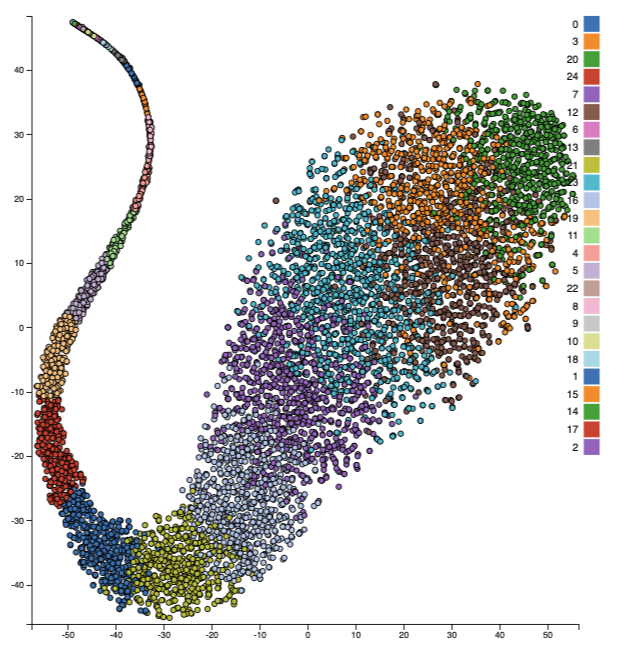

In [285]:
#This is an autograded cell, do not edit/delete
Image('trained_scatter.png')

### **Q7** Visualizing the PRE-TRAINED vectors (1.5 points)

In this question, you'll execute the same analysis as in Q6, but on PRE-TRAINED vectors.

#### **Q7a**

Load the google vector model 

(It must be downloaded as `GoogleNews-vectors-negative300.bin.gz` for you if you ran the first code-chunk at the top of this notebook)


In [122]:
google_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True) 
google_model_wv = google_model.wv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


Downsample the pre-trained google model to anywhere between 10,000 to 25,000 words.

In [123]:
random_words = np.random.choice(google_model_wv.index2word, size = 10000, replace = False)

Create a list of the unique set of words from this downsampled model

In [124]:
google_unique_words = list(set(random_words))

Extract respective vectors corresponding to the words in the down-sampled, pre-trained model

In [125]:
google_vectors = google_model[google_unique_words]
google_vectors

array([[-0.00765991,  0.05053711,  0.04541016, ..., -0.11767578,
        -0.0043335 ,  0.078125  ],
       [ 0.04589844,  0.06982422,  0.03881836, ..., -0.02160645,
        -0.00064087,  0.0390625 ],
       [-0.07421875,  0.08544922, -0.0378418 , ...,  0.09472656,
         0.04931641, -0.00952148],
       ...,
       [-0.07470703, -0.40429688, -0.30664062, ..., -0.34375   ,
         0.38671875, -0.11914062],
       [-0.01446533, -0.140625  ,  0.08691406, ...,  0.0291748 ,
         0.11523438,  0.14160156],
       [ 0.046875  ,  0.06079102,  0.05273438, ..., -0.09814453,
         0.01708984,  0.05029297]], dtype=float32)

#### **Q7b**

Run Kmeans clustering on the pre-trained word vectors. Make sure to use the word vectors from the pre-trained model.

In [126]:
kmeans_pre_trained = KMeans(n_clusters = 25, random_state = 42)
kmeans_pre_trained.fit(google_vectors)
google_centers = kmeans_pre_trained.cluster_centers_
google_labels = kmeans_pre_trained.labels_

#### **Q7c**
Reduce the dimensionality of the word vectors from the pre-trained model using TSNE

In [127]:
data_embed_google = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(google_vectors)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.424s...
[t-SNE] Computed neighbors for 10000 samples in 83.537s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.297430
[t-SNE] Computed conditional probabilities in 0.963s
[t-SNE] Iteration 50: error = 91.2026749, gradient norm = 0.1619792 (50 iterations in 9.213s)
[t-SNE] 

#### **Q7d**

#### Create a dataframe with the following columns using the pre-trained vectors and corpus:

| Column |Description|
| --- | --- | 
| x | the first dimension of result from TSNE |
| y | the second dimension of result from TSNE |
| Feature 1 | the word corresponding to the vector |
| Feature 2 | the kmeans cluster label |

<br>

Below is a sample of what the dataframe could look like:

|x	|y|	Feature 1|	Feature 2|
| --- | --- | --- | --- | 
|	7.154159	|9.251100|	lips	|8|
|	-53.254147|	-13.514915|	them|	9|
|	34.049191	|-13.402843|	topic|	0|
|	-32.515320|	28.699677|	sofa|	24|
|	13.006302	|-4.270626|	half-past|	21|

In [128]:
df_google = pd.DataFrame(data_embed_google[:, :2], columns = ["x", "y"])
df_google['Feature 1'] = google_unique_words
df_google['Feature 2'] = google_labels
df_google.head()


,x,y,Feature 1,Feature 2
0,-0.479943,4.134268,PROPOSITIONS_Voters,13
1,-18.458391,18.515255,Faye_Barhorst,24
2,16.175072,-19.541786,Manibhandu,5
3,2.381259,-29.446341,BRAIN_DAMAGE,13
4,-2.453727,-31.996305,TO_REQUEST,19


#### **Q7e: Visualization** 

In this question, you are required to visualize and explore the reduced dataset **from the pretrained model** you created in Q7d using the [d3-scatterplot](https://github.com/CAHLR/d3-scatterplot) library.

Note: The first code-chunk at the top in this notebook clones the libary from github. Make sure that it has been executed before you proceed.

##### Save your dataset as a tsv file 'd3-scatterplot/google_mytext.tsv'

Example:

```
google_df.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)
```


Note 1: The TSV file needs to be stored in the `d3-scatterplot` folder so that the d3-scatterplot library can access it.

Note 2: Make sure to save the TSV file WITHOUT the row index i.e. use `index=False`.


In [129]:
df_google.to_csv('d3-scatterplot/google_mytext.tsv', sep='\t', index=False)

##### Visualize the reduced vectors by running the following code


In [300]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

port = 8001
data_file = 'google_mytext.tsv'
height = 1400

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

Color the points by their kmeans cluster. You can do this by choosing "Feature 2" as the variable in the "Color" drop-down in the visualization. 

Pleae include a snapshot of your visualization in the notebook. Refer to the tutorial video, and/or follow the steps below:

1) Take a sanpshot of the visualization and save it on your computer with the filename `google_trained_scatter.png`

2) Upload the `google_trained_scatter.png` by clicking on the 'Files' icon on the left sidebar and clicking on the upload icon (the one with an upward arrow on top left)

3) Run the code below to display the image

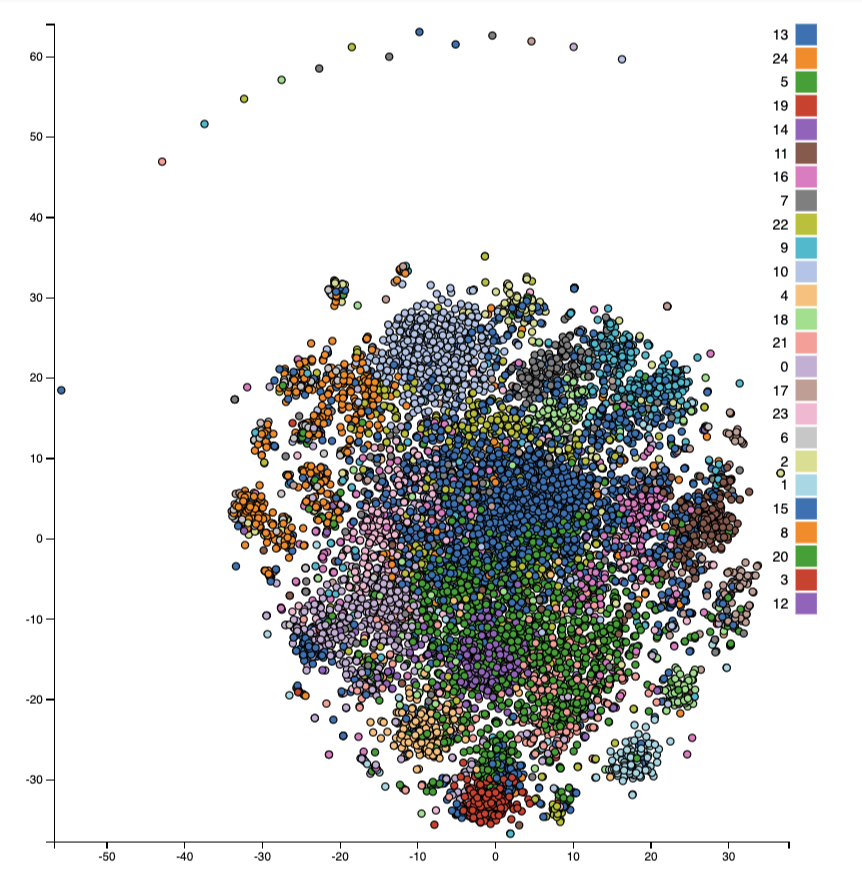

In [256]:
#This is an autograded cell, do not edit/delete
Image('google_trained_scatter.png')

### **Q8: Exploration** (0.5 point) 

This is an open-ended question.

On the visualizations in Q6 & Q7, lasso select a group of points with the left mouse button and look at summaries of the group on the right-side of the plot. (Refer to the tutorial video for a demo on the lasso selection). Also look at the words / features of the selected points. 

Comment on any patterns / similarities you see in the selected words in the visualization for the pre-trained vectors and the vectors trained on your corpus. Are you able to find any group of points that are close to each other in the 2D space that also have semantic similarity?

a) When looking at trained_scatter, it was difficult to find clusters with noticable patterns. However, when I looked into cluster 10, I saw both "Gatsby" and "Tom". Because these two characters represent the protagonist and antagonist, I assumed that there would be some simiilarity between the two words. And after testing it out, I found that "Tom" and "Gatsby" had high cosine similarity (0.999).

b) When looking at google_trained_scatter, it was also difficult to find clusters with noticable patterns. However, when I looked into cluster 24, I found the name "Amir_Celestin" and the word "pointguard". Amir Celestin is a professional basketball player who plays the pointguard position. Thus, I expected that there would be a high cosine similarity between the two. Unfortunately, when I calculated the similarity, it turns out that this hypothesis was incorrect and "Amir_Celestin" and "pointgard" do not have much similarity.



In [287]:
model_wv.similarity('Gatsby', 'Tom')

0.9997246

In [289]:
google_model_wv.similarity('Amir_Celestin', 'pointguard')

0.39669186